In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import requests
import numpy as np
import pandas as pd

In [2]:
MOORGATE = (51.518547, -0.088350)
DATE = "2014-12"

URL = "http://data.police.uk/api/crimes-street/all-crime?lat={}&lng={}&date={}".format(
    MOORGATE[0], MOORGATE[1], DATE
)

In [3]:
response = requests.get(URL)
df = pd.read_json(response.content)
df

,category,context,id,location,location_subtype,location_type,month,outcome_status,persistent_id
0,anti-social-behaviour,,38085998,"{'street': {'id': 961574, 'name': 'On or near ...",,Force,2014-12,None,
1,anti-social-behaviour,,38085999,"{'street': {'id': 961574, 'name': 'On or near ...",,Force,2014-12,None,
2,anti-social-behaviour,,38086000,"{'street': {'id': 961552, 'name': 'On or near ...",,Force,2014-12,None,
3,anti-social-behaviour,,46683781,"{'street': {'id': 1487987, 'name': 'London Bri...",STATION,BTP,2014-12,None,
4,anti-social-behaviour,,38086001,"{'street': {'id': 955949, 'name': 'On or near ...",,Force,2014-12,None,
5,anti-social-behaviour,,38086003,"{'street': {'id': 955949, 'name': 'On or near ...",,Force,2014-12,None,
6,anti-social-behaviour,,38086023,"{'street': {'id': 961560, 'name': 'On or near ...",,Force,2014-12,None,
7,anti-social-behaviour,,38086024,"{'street': {'id': 961560, 'name': 'On or near ...",,Force,2014-12,None,
8,anti-social-behaviour,,38086025,"{'street': {'id': 956033, 'name': 'On or near ...",,Force,2014-12,None,
9,anti-social-behaviour,,38086027,"{'street': {'id': 961351, 'name': 'On or near ...",,Force,2014-12,None,


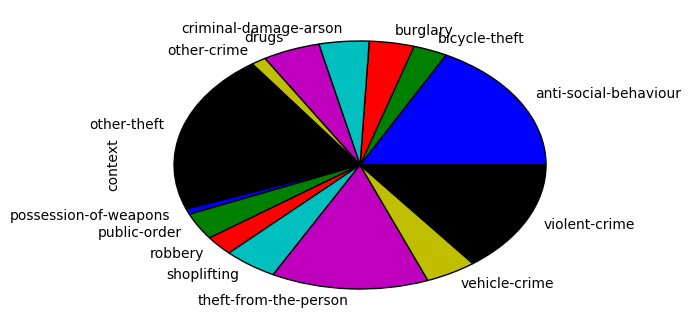

In [4]:
df.groupby('category')['context'].count().plot(kind='pie')

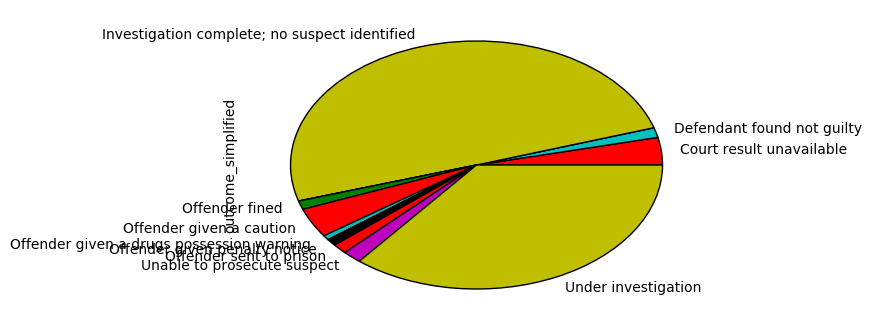

In [5]:
# add an extra column
extract_category = lambda x: x if x is None else x['category']
df['outcome_simplified'] = df['outcome_status'].apply(extract_category)

counter = df.groupby('outcome_simplified')['outcome_simplified'].count()
to_remove = counter[counter <= 10]
cleaned = counter.replace(to_remove, np.nan)

cleaned.plot(kind='pie')

In [ ]:
# per una visualizzazione veloce su mappa
from ipyleaflet import Map, Circle
MOORGATE = (51.518547, -0.088350)
m  = Map(center=MOORGATE, zoom=15)
circles = [Circle(location=pos, radius=30) for pos in [MOORGATE]]
for c in circles: m.add_layer(c)

#m 
# prints the map, put at the and of a cell
#for c in circles: m.remove_layer(c)